
## Mario 🎮 - Reinforcement Learning Self Project

*Mohd Armugan Sarwar*

In [2]:
!pip install gym_super_mario_bros==7.3.0 nes_py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 198 kB 6.8 MB/s 
     |████████████████████████████████| 77 kB 8.1 MB/s 
     |████████████████████████████████| 1.1 MB 45.0 MB/s 
  Created wheel for nes-py: filename=nes_py-8.2.1-cp37-cp37m-linux_x86_64.whl size=435255 sha256=a5998a2f9f15952f0dc3f454bff91ee1d801caa8dca56ad3dc84d31cf39bcc25
  Stored in directory: /root/.cache/pip/wheels/17/96/0e/22a8c7dbdf412d8e988286f223b223baf0f4ad90c9e699c56d
Successfully built nes-py


In [3]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [4]:
env = gym_super_mario_bros.make('SuperMarioBros-v3')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [ ]:
done = True
for step in range(100000): 
    if done: 
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()

In [ ]:
env.close()

In [ ]:
!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!pip install stable-baselines3[extra]

In [6]:
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt

In [7]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [9]:
state = env.reset()

In [14]:
state, reward, done, info = env.step([5])

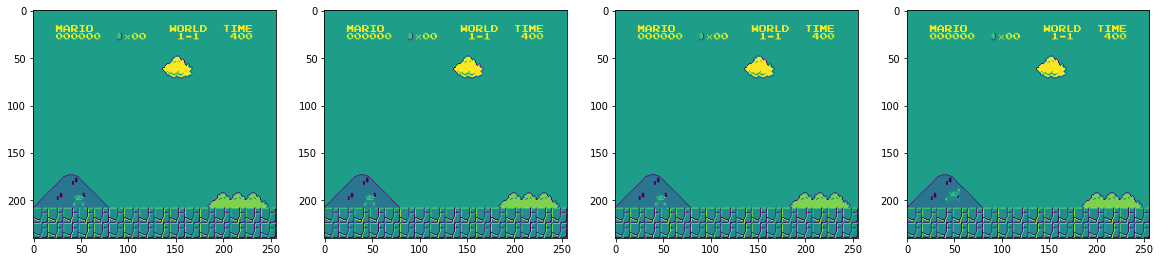

In [15]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [16]:
import os
from stable_baselines3 import PPO

In [17]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [18]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [22]:
model.learn(total_timesteps=2048)
model.save('saved_model')

Logging to ./logs/PPO_4
----------------------------
| time/              |     |
|    fps             | 56  |
|    iterations      | 1   |
|    time_elapsed    | 9   |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 9            |
|    iterations           | 2            |
|    time_elapsed         | 108          |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 7.759477e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | 0.0189       |
|    learning_rate        | 1e-06        |
|    loss                 | 164          |
|    n_updates            | 30           |
|    policy_gradient_loss | -0.000702    |
|    value_loss           | 474          |
------------------------------------------

#### Testing

In [24]:
model = PPO.load('saved_model')

In [ ]:
state = env.reset()

In [ ]:
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()